<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 <br>
<font color=696880 size=4>

**Name: Radin Khayyam**

**Student Number: 99101579**


# LFP data

What is LFP (Local Field Potential) signal? Explain briefly  (5 points)

Your answer:

The Local Field Potential (LFP) is a measure of the electrical activity generated by a population of neurons in a specific region of the brain. It represents the collective synaptic inputs and outputs of a group of neurons near the recording electrode. LFP signals typically have a lower frequency range compared to action potentials (spikes) and are measured using electrodes placed within the brain tissue or on its surface. LFP recordings are valuable for studying brain rhythms, neural synchronization, and information processing in various brain regions and are often used in neuroscience research to understand brain function and dysfunction.

What is Gamma frequency entrainment? Explain (5 points)

Your answer:

Gamma frequency entrainment refers to the synchronization of brainwave activity with external stimuli, such as auditory or visual cues, oscillating at gamma frequencies (approximately 25 to 100 Hz). This phenomenon is significant as gamma waves are associated with various cognitive functions like memory and attention. Entrainment can occur through methods like listening to rhythmic auditory beats, watching visual stimuli, or even engaging in meditation practices. Understanding gamma frequency entrainment provides insights into brain function and potential therapeutic applications for neurological and psychiatric disorders.

Study about Gamma frequency entrainment's effect on the subject. Explain how it affects the brain. (This article could be useful: Gamma frequency entrainment attenuats amyloid load and modifies microglia)  (5 points)


Your answer:

Gamma frequency entrainment, specifically at 40 Hz, has been shown to have a significant impact on reducing amyloid-β (Aβ) levels in the brain. This effect was observed in both optogenetic stimulation of hippocampal neurons in a mouse model of Alzheimer's disease (AD) and non-invasive light flicker treatment in the visual cortex. The reduction in Aβ levels was accompanied by a microglial response, indicating a potential neuroprotective effect. Additionally, the entrainment of 40 Hz gamma oscillations induced morphological transformation of microglia and reduced phosphorylated tau levels, suggesting a broad spectrum of systemic effects in the brain. These findings suggest that gamma frequency entrainment may have a neuroprotective role by recruiting both neuronal and glial responses to attenuate AD-associated pathology. Furthermore, the study indicates that GABAergic neurotransmission is critical for these effects, highlighting the intricate relationship between gamma oscillations and cellular pathologies in the brain.

There is an LFP_data file in the zip file, which is located in the CW. This data is related to an experiment with 120 trials and 3 different brain regions of a rat. Each trial consists of 6000 samples, and the sample rate is 2000, resulting in 3 seconds of data per trial. Within this file, there is a channelData matrix that contains recorded data for each region. Additionally, there is a digitalByte vector that specifies when trials began and ended using pulses with an amplitude of 128. Open the file, print the size of the digitalByte and channelData, and then plot the digitalByte.  (5 points)

In [ ]:
# import all the necessary libraries here
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Shape of channelData: (1495741, 3)
Shape of digitalByte: (1495741, 1)


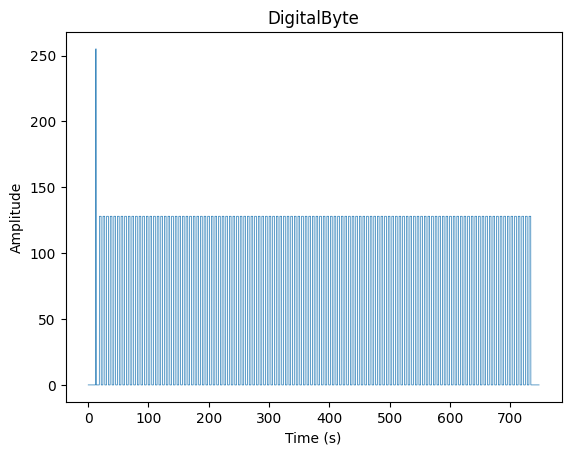

In [ ]:
# Load the data from the file provided
#############################
# Your code goes here
channelData = sp.io.loadmat('sessionData.mat')['channelData']
digitalByte = sp.io.loadmat('sessionData.mat')['digitalByte']
time = sp.io.loadmat('sessionData.mat')['time']
fs = 2000
#############################

print("Shape of channelData:", channelData.shape)
print("Shape of digitalByte:", digitalByte.shape)

# Plot digitalByte
plt.plot(np.transpose(time), digitalByte, linewidth=0.5)
plt.title("DigitalByte")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Pre-processing of the data

Now we want to pre process our data. Follow the following steps and explain why we do them:  (points 20)

1. Apply a bandpass filter in the range 1-300 Hz on the signal of each region.

2. Convert the signal to 120 stimulus trials using digitalByte.

3. Apply z-score normalization on each trial.

Apply a bandpass filter (1-300 Hz) to improve signal quality by removing noise and focusing on neural activity relevant to cognitive processes. This aids data interpretation and compatibility with recording systems, avoiding aliasing issues.

Convert the signal into 120 stimulus trials using digitalByte, allowing independent analysis of responses to each stimulus, aiding result interpretation and pattern identification.

Normalize each trial using z-score normalization to center data around zero, standardize variance across trials, and facilitate comparison across experimental conditions or subjects.

In [ ]:
# preprocess
def bandpass_filter(data, low_freq, high_freq, fs):
    # Apply a band pass filter on the data
    #############################
    # Your code goes here
    b, a = sp.signal.butter(3, [low_freq / (fs / 2), high_freq / (fs / 2)], btype='band')
    filtered_data = sp.signal.filtfilt(b, a, data, axis=0)
    #############################
    return filtered_data


def convert_to_trials(data,digitalByte):
    # Extract the trials of the signal
    #############################
    # Your code goes here
    counter = 0
    trials = np.zeros((120, 6000, 3))

    for i in range(1,len(digitalByte)):
        if (digitalByte[i-1] == 0 and digitalByte[i] == 128):
          trials[counter, :, :] = data[i:i+6000, :]
          counter += 1
    #############################
    return trials

def z_score(data):
    # Calculate the z_score for the data and return the results
    #############################
    # Your code goes here
    z_score_data = np.zeros((120, 6000, 3))
    for i in range(120):
        mean = np.mean(data[i], axis=0)
        std = np.std(data[i], axis=0)
        z_score_data[i, :, :] = (data[i] - mean) / std

    #############################
    return z_score_data

# Define frequency band
low_freq = 1
high_freq = 300

# Apply bandpass filter
data = bandpass_filter(channelData, low_freq, high_freq, fs)

# Convert to trials
data = convert_to_trials(data, digitalByte)

# Apply z-score normalization on each trial
data = z_score(data)


 The three regions represented in the data, respectively, are the Hippocampus, the mPFC (medial Prefrontal Cortex), and the Ventral Striatum. Explain functionality of these regions briefly.  (10 points)

Your answer:

**Hippocampus**: The hippocampus is primarily associated with memory formation and spatial navigation. It plays a crucial role in the consolidation of short-term memory into long-term memory and in spatial memory, allowing individuals to navigate and remember the spatial layout of their environment. Additionally, the hippocampus is involved in emotional regulation and is implicated in various psychiatric disorders such as depression and post-traumatic stress disorder (PTSD).

**Medial Prefrontal Cortex (mPFC)**: The medial prefrontal cortex is involved in higher cognitive functions such as decision-making, executive control, and social behavior. It is responsible for integrating sensory information, memory, and emotional responses to guide goal-directed behavior and adapt to changing environments. Dysfunction in the mPFC has been linked to disorders like schizophrenia, depression, and anxiety.

**Ventral Striatum**: The ventral striatum, which includes the nucleus accumbens, is a key component of the brain's reward system. It plays a central role in motivation, reinforcement learning, and the experience of pleasure. The ventral striatum is heavily involved in processing rewards and reinforcing behaviors associated with positive outcomes. Dysregulation of the ventral striatum is implicated in addiction, compulsive behaviors, and mood disorders.

What is ERP of a neural signal ? Calculate the ERP of given data for each region and plot it(set title for x, y axes.)  (10 points)

Your answer:

ERP stands for Event-Related Potential. It refers to the measured brain response that is the direct result of a specific sensory, cognitive, or motor event.

When a person is exposed to a stimulus, such as a visual cue or a sound, the brain responds by generating electrical potentials. These potentials can be measured as voltage fluctuations over time. The ERP represents the average of these voltage fluctuations across multiple trials, synchronized to the onset of the stimulus. By averaging across trials, researchers can isolate the brain's response to the stimulus from background noise and other unrelated brain activity.

ERPs are used extensively in cognitive neuroscience and psychology to study various cognitive processes, such as attention, memory, language processing, and decision-making. Different components of ERP waveforms, such as P100, N200, and P300, are associated with specific cognitive processes and are often used to investigate how the brain processes information in real-time.

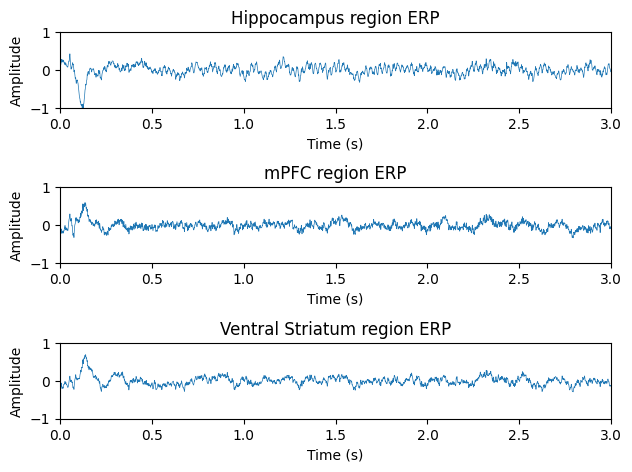

In [ ]:
#ERP calculation
def ERP_calc(data):
    # Calsulate the ERP of the data
    #############################
    # Your code goes here
    ERP = np.mean(data, axis=0)
    #############################
    return ERP

ERP_data = ERP_calc(data)

# Plot ERP for each region
t = np.arange(start=0, stop=3, step=1/fs)

fig, axs = plt.subplots(3)


axs[0].plot(t, ERP_data[:, 0], linewidth=0.5)
axs[0].set_title("Hippocampus region ERP")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")
axs[0].set_ylim(-1, 1)
axs[0].set_xlim(0, 3)

axs[1].plot(t, ERP_data[:, 1], linewidth=0.5)
axs[1].set_title("mPFC region ERP")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")
axs[1].set_ylim(-1, 1)
axs[1].set_xlim(0, 3)

axs[2].plot(t, ERP_data[:, 2], linewidth=0.5)
axs[2].set_title("Ventral Striatum region ERP")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Amplitude")
axs[2].set_ylim(-1, 1)
axs[2].set_xlim(0, 3)

fig.tight_layout(pad=1.0)

plt.show()




# Entrainment and some processing techniques

Now we want to observe the effect of the entrainment on the LFP signal.

1. Write a function which takes a signal and it's respective sample rate and calculate it's PSD. (Hint: You can use some specific modules of the mentioned libraries.)

2. Write a function that takes the trials of a signal, calculates the PSD (using part 1) of each trial, and averages these PSDs. We refer to this averaged PSD as the ERSP. Draw ERSP  of Hippocampus, mPFC and Ventral Striatum (set legend, x and y title.) Explain your results.  (20 points)

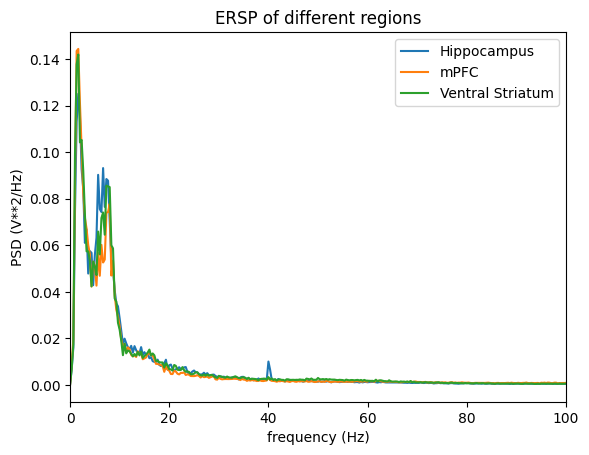

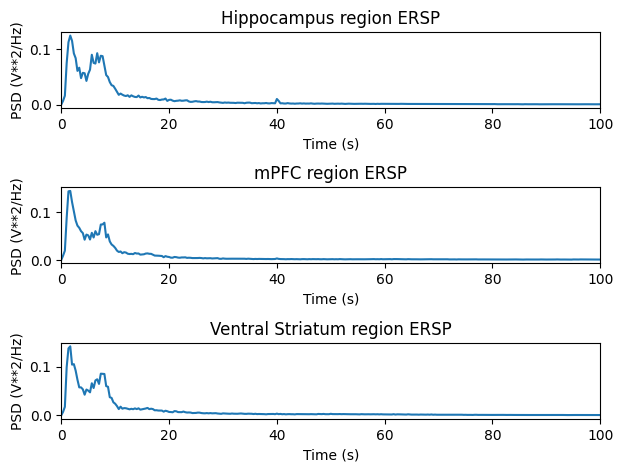

In [ ]:
# ERSP calculation
def PSD(data, sample_rate):
    # Calsulate the PSD of the data
    #############################
    # Your code goes here
    (f, S)= sp.signal.periodogram(data, fs, scaling='density')
    #############################
    return S

def ERSP(trials):
    # Calsulate the ERSP of the data
    #############################
    ERSP_1 = np.zeros((1,3001))
    ERSP_2 = np.zeros((1,3001))
    ERSP_3 = np.zeros((1,3001))

    for i in range(trials.shape[0]):
      ERSP_1 += PSD(trials[i, :, 0], fs)
      ERSP_2 += PSD(trials[i, :, 1], fs)
      ERSP_3 += PSD(trials[i, :, 2], fs)

    ERSP_1 = ERSP_1 / trials.shape[0]
    ERSP_2 = ERSP_2 / trials.shape[0]
    ERSP_3 = ERSP_3 / trials.shape[0]
    #############################
    return ERSP_1, ERSP_2, ERSP_3

ERSP_1, ERSP_2, ERSP_3 = ERSP(data)
f = np.transpose(np.linspace(0, 1000, num = 3001))



plt.plot(f, ERSP_1[0, :])
plt.plot(f, ERSP_2[0, :])
plt.plot(f, ERSP_3[0, :])

plt.title("ERSP of different regions")
plt.xlabel("frequency (Hz)")
plt.ylabel("PSD (V**2/Hz)")
plt.xlim(0,100)

plt.legend(["Hippocampus" ,"mPFC", "Ventral Striatum"])

plt.show()

fig, axs = plt.subplots(3)

axs[0].plot(f, ERSP_1[0])
axs[0].set_title("Hippocampus region ERSP")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("PSD (V**2/Hz)")
axs[0].set_xlim(0, 100)

axs[1].plot(f, ERSP_2[0])
axs[1].set_title("mPFC region ERSP")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("PSD (V**2/Hz)")
axs[1].set_xlim(0, 100)

axs[2].plot(f, ERSP_3[0])
axs[2].set_title("Ventral Striatum region ERSP")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("PSD (V**2/Hz)")
axs[2].set_xlim(0, 100)

fig.tight_layout(pad=1.0)

plt.show()


Draw PSD of ERP for each region and compare results to ERSPs.(PSDs should be in the same plot. Set legend and proper labels)  (10 points)

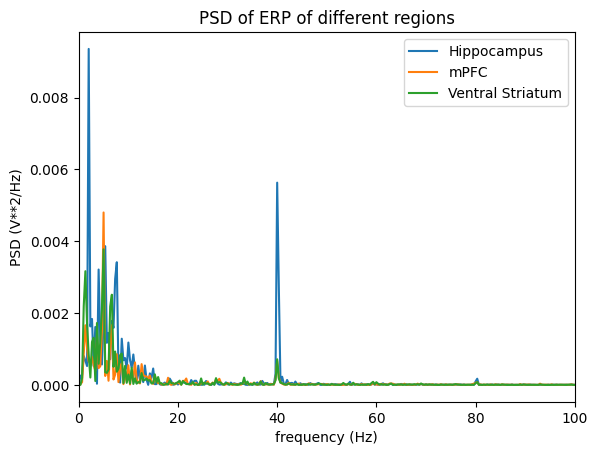

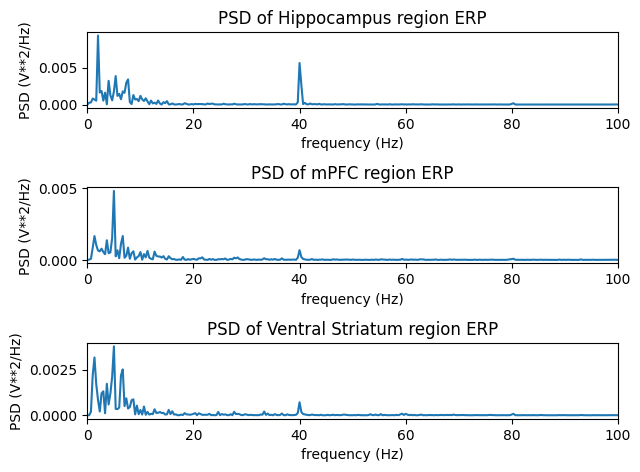

In [ ]:
#ERSPs vs PSD of ERPs
#############################
# Your code goes here
ERP_data = ERP_calc(data)

PSD_ERP_1 = PSD(ERP_data[:, 0], fs)
PSD_ERP_2 = PSD(ERP_data[:, 1], fs)
PSD_ERP_3 = PSD(ERP_data[:, 2], fs)

f = np.transpose(np.linspace(0, 1000, num = 3001))

plt.plot(f, PSD_ERP_1)
plt.plot(f, PSD_ERP_2)
plt.plot(f, PSD_ERP_3)

plt.title("PSD of ERP of different regions")
plt.xlabel("frequency (Hz)")
plt.ylabel("PSD (V**2/Hz)")
plt.xlim(0,100)

plt.legend(["Hippocampus" ,"mPFC", "Ventral Striatum"])

plt.show()

fig, axs = plt.subplots(3)

axs[0].plot(f, PSD_ERP_1)
axs[0].set_title("PSD of Hippocampus region ERP")
axs[0].set_xlabel("frequency (Hz)")
axs[0].set_ylabel("PSD (V**2/Hz)")
axs[0].set_xlim(0, 100)

axs[1].plot(f, PSD_ERP_2)
axs[1].set_title("PSD of mPFC region ERP")
axs[1].set_xlabel("frequency (Hz)")
axs[1].set_ylabel("PSD (V**2/Hz)")
axs[1].set_xlim(0, 100)

axs[2].plot(f, PSD_ERP_3)
axs[2].set_title("PSD of Ventral Striatum region ERP")
axs[2].set_xlabel("frequency (Hz)")
axs[2].set_ylabel("PSD (V**2/Hz)")
axs[2].set_xlim(0, 100)

fig.tight_layout(pad=1.0)

plt.show()
#############################

As evident from the data, the outcomes diverge from those of ESRP due to the non-linear nature of PSD. In ESRP, PSD is computed for each trial before averaging, whereas in this section, we first average the trials and then compute the PSD. Although ERSP calculation entails greater complexity, it yields a smoother plot compared to the PSD of ERP signals.

Functional connectivity (FC) refers to the temporal correlations between spatially remote neurophysiological events. In simpler terms, it’s about how different brain regions communicate and synchronize their activity. Phase-phase coupling is one of the most important types of the FC. Study about PLV and PLI, explain how they are work and compare them. (This article could be useful: Phase lag index: Assessment of functional connectivity from multi channel EEG and MEG with diminished bias from common sources. in this article PLV mentioned as mean phase coherency)  (10 points)

Your answer:

Phase Locking Value (PLV) and Phase Lag Index (PLI) are both measures used to quantify the synchronization or connectivity between two signals, such as brain activity recorded from different electrodes.

PLV measures the consistency of the phase relationship between two signals at a specific frequency. It calculates the average phase difference between the two signals over multiple time points and provides a value between 0 and 1, where 0 indicates no phase locking and 1 indicates perfect phase locking. PLV is sensitive to both linear and nonlinear phase relationships.

$$PLV = |\frac{1}{N} \sum_{n=1}^N e^{j\Delta \phi_n (t)}|$$

On the other hand, PLI measures the asymmetry of the distribution of phase differences between two signals. It focuses on the consistency of the phase lag between the two signals, rather than the exact phase relationship. PLI provides a value between 0 and 1, where 0 indicates no phase lag and 1 indicates consistent phase lag. PLI is primarily sensitive to nonlinear phase relationships.

$$ PLI = |\frac{1}{N} \sum_{n=1}^N sign(\Delta \phi_n(t))|$$
When comparing PLV and PLI, both measures are used to assess the strength of synchronization or connectivity between two signals. However, they differ in terms of the aspect of phase relationship they emphasize. PLV focuses on the consistency of the phase relationship, while PLI focuses on the consistency of the phase lag.

In terms of their performance, studies have shown that PLV and PLI have different sensitivities to certain factors. PLV is more sensitive to volume conduction effects and local connections between adjacent sensors. On the other hand, PLI is less affected by volume conduction and is more sensitive to long-distance interactions. PLI is also less influenced by spurious correlations caused by common sources.

(Bonus) Study about wPLI. Explain the differences between wPLI and PLI. Suggest a code to calculate wPLI and plot the results. You may use the functions that you have already defined.(Set x,y label and legend)  (25 points)

Phase Lag Index (PLI) and its derivative, the weighted Phase Lag Index (wPLI), are essential metrics employed in neuroimaging to evaluate the functional connectivity between brain regions, leveraging EEG (electroencephalogram) or MEG (magnetoencephalography) signals. Despite serving a similar purpose, these measures diverge in their treatment of phase discrepancies within signals.

**Phase Lag Index (PLI):**
PLI characterizes the asymmetry within the phase discrepancies between two signals. It assesses the consistency of phase differences over time rather than their magnitude. Notably adept at identifying phase synchronization between brain regions, even with minor phase differences. PLI demonstrates reduced susceptibility to volume conduction effects and common reference artifacts compared to alternative connectivity metrics.

$$
PLI = \frac{1}{N} \left| \sum_{t=1}^{N} \text{sign} \left[ \text{Imag} \{ \text{CrossSpectrum}(x(t), y(t)) \} \right] \right|
$$
**Weighted Phase Lag Index (wPLI):**
wPLI improves upon PLI by incorporating a weighting scheme based on the imaginary part of the cross-spectrum, aiming to minimize the influence of volume conduction effects. It prioritizes phase differences less prone to volume conduction or common reference artifacts. Additionally, wPLI can offer increased robustness to noise and volume conduction effects, especially in scenarios involving dense electrode arrays or noisy signal recordings.

$$
wPLI = \frac{\left| \sum_{t=1}^{N} \text{Imag} \{ \text{CrossSpectrum}(x(t), y(t)) \} \right|}{\sum_{t=1}^{N} | \text{Imag} \{ \text{CrossSpectrum}(x(t), y(t)) \} |}
$$



while both PLI and wPLI are used to assess functional connectivity based on phase relationships between neural signals, wPLI extends PLI by incorporating additional measures to mitigate the influence of volume conduction and common reference artifacts, potentially offering improved sensitivity and specificity in connectivity analysis.

<ipython-input-44-85382664f42e>:21: RuntimeWarning: invalid value encountered in divide
  wPLI_12 = np.abs(num_total)/denom_total
<ipython-input-44-85382664f42e>:31: RuntimeWarning: invalid value encountered in divide
  wPLI_13 = np.abs(num_total)/denom_total
<ipython-input-44-85382664f42e>:41: RuntimeWarning: invalid value encountered in divide
  wPLI_23 = np.abs(num_total)/denom_total


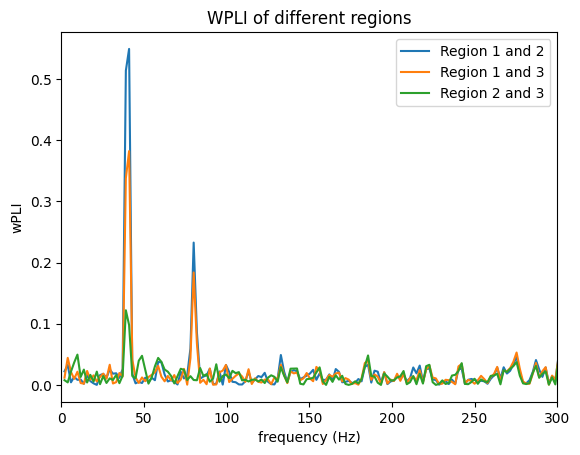

In [ ]:
# WPLI
def WPLI(x, y, fs):
    #############################
    # Your code goes here
    f, Pxy = sp.signal.csd(x, y, fs, nperseg=1024)

    I = Pxy.imag
    num = I
    denom = np.abs(I)
    #############################
    return num, denom

num_total = np.zeros((513))
denom_total = np.zeros((513))
for i in range(120):
  for j in range(i, 120):
    num, denom = WPLI(data[i,:,0],data[j,:,1],fs)
    num_total += num
    denom_total += denom

wPLI_12 = np.abs(num_total)/denom_total

num_total = np.zeros((513))
denom_total = np.zeros((513))
for i in range(120):
  for j in range(i, 120):
    num, denom = WPLI(data[i,:,0],data[j,:,2],fs)
    num_total += num
    denom_total += denom

wPLI_13 = np.abs(num_total)/denom_total

num_total = np.zeros((513))
denom_total = np.zeros((513))
for i in range(120):
  for j in range(i, 120):
    num, denom = WPLI(data[i,:,1],data[j,:,2],fs)
    num_total += num
    denom_total += denom

wPLI_23 = np.abs(num_total)/denom_total


f = np.linspace(0, 1000, num=513)

plt.plot(f, wPLI_12)
plt.plot(f, wPLI_13)
plt.plot(f, wPLI_23)

plt.title("WPLI of different regions")
plt.xlabel("frequency (Hz)")
plt.ylabel("wPLI")
plt.xlim(0,300)

plt.legend(["Region 1 and 2" ,"Region 1 and 3", "Region 2 and 3"])

plt.show()
